In [357]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
!pip install openai

In [358]:
import time
#검색 아이콘 찾기. [아이콘이 없어 필요X]
# search_icon = driver.find_element(By.XPATH, '//*[@id="__next"]/header/div[1]/section/div[2]/div[1]/button/svg/path')
# print(search_icon.text)

driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
url = "http://data.krx.co.kr/contents/MDC/MAIN/main/index.cmd"
driver.get(url)

time.sleep(6) #페이지 로딩시간

#검색 버튼 막는 창 끄기 
search_ad_button = driver.find_element(By.XPATH, '//*[@id="jsDetailLayer_MDCMAIN003"]/div[3]/div/button')
search_ad_button2 = driver.find_element(By.XPATH, '//*[@id="jsDetailLayer_MDCMAIN004"]/div[1]/button')
search_ad_button2.click()
search_ad_button.click()
#검색 인풋 찾기
search_input = driver.find_element(By.XPATH, '//*[@id="jsTotSch"]')
#검색 버튼 찾기
search_button = driver.find_element(By.XPATH, '//*[@id="jsTotSchBtn"]')
#검색 항목 변경을 위해서 여기서 종목이름 변경
find_name = '삼성전자'
#검색 인풋 넣기
search_input.send_keys(find_name)
search_button.click()
#정보 가져오기

time.sleep(2)
#불러오기 정보 토큰
find_stock = '//*[@id="isuInfoTitle"]/span'
find_incdec = '//*[@id="isuInfoTitle"]/span/dfn'
find_start = '//*[@id="isuInfoBind"]/table/tbody/tr[1]/td[1]'
find_high = '//*[@id="isuInfoBind"]/table/tbody/tr[2]/td[1]'
find_low = '//*[@id="isuInfoBind"]/table/tbody/tr[3]/td[1]'

#토큰 불러오기
sear_name = find_name
sear_stock = driver.find_element(By.XPATH, find_stock)
sear_incdec = driver.find_element(By.XPATH, find_incdec)
sear_start = driver.find_element(By.XPATH, find_start)
sear_high = driver.find_element(By.XPATH, find_high)
sear_low = driver.find_element(By.XPATH, find_low)


#주가가 바로 추출이 안 되므로 전체str에서 추출.
sear_stock_str = ''
for i in sear_stock.text :
    if i=='▼' or i=='▲' or i=='(' or i=='-':
        break;
    sear_stock_str += i

#요구 정보 추출
print("종목이름 :", sear_name)
print("주가 :", sear_stock_str)
print("주가증감 :", sear_incdec.text)
print("시가 :", sear_start.text)
print("고가 :", sear_high.text)
print("저가 :", sear_low.text)

종목이름 : 삼성전자
주가 : 57,300
주가증감 : ▼300 (-0.52%)
시가 : 57,600
고가 : 58,000
저가 : 56,300


In [359]:
#챗지피티
from openai import OpenAI

#오픈AI API키 입력
myapikey = "여기에 오픈 AI api key 입력"

client = OpenAI(api_key = myapikey)

response = client.chat.completions.create(
    model = 'gpt-4o-mini',
    messages = [
        {"role":"system", "content":"너는 스마트한 금융 정보 제공 AI 챗봇이야."},
        {"role":"user", "content":f"실시간 검색을 이용해서 종목이름인 {sear_name}과, 주가인 {sear_stock_str}과, 주가증감인 {sear_incdec.text}과, 시가인 {sear_start.text}과, 고가인 {sear_high.text}와, 저가인 {sear_low.text}를 참고해서 {sear_name}의 정량적인 분석을 해줘"}
    ],
    max_tokens=500
)

## 챗지피티를 활용한 정량적인 분석
gpt_response = response.choices[0].message.content
print(gpt_response)

삼성전자의 주가와 관련된 다양한 지표를 바탕으로 정량적인 분석을 수행해 보겠습니다.

1. **현재 주가**: 57,300원
2. **주가 증감**: ▼300원 (-0.52%)
   - 최근 하루 동안의 주가는 소폭 하락했음을 나타냅니다. 이는 투자자들의 매도 심리가 최근에 작용했을 가능성이 있습니다.

3. **시가**: 57,600원
   - 오늘 거래가 시작된 가격보다 현재 주가가 낮아졌음을 알 수 있습니다. 이는 시장에서 삼성전자에 대한 수요가 감소했을 수 있음을 시사합니다.

4. **고가**: 58,000원
   - 오늘 하루 동안 삼성전자의 주가는 최고 58,000원에 도달했습니다. 이를 통해 시장의 변동성을 볼 수 있으며, 투자자들이 일정 가격대에서는 매수세가 발생했음을 알 수 있습니다.

5. **저가**: 56,300원
   - 오늘 하루의 최저 주가는 56,300원이므로, 현재 주가는 최저가에 비해 1,000원 정도 높은 수준입니다. 이는 해당 가격대에서 지지가 될 가능성이 있을 수 있습니다.

### 종합적인 분석:
- **하락세**: 삼성전자는 전일 대비 0.52% 하락하였으며, 이는 투자 심리의 부정적인 요소를 나타낼 수 있습니다. 
- **가격 범위**: 주가는 56,300원에서 58,000원 사이에서 움직였으며, 현재 57,300원에 위치하고 있습니다. 이는 매수와 매도의 경계선인 지지선과 저항선에서 중간 지점에 위치하고 있다는 의미로, 향후 주가의 방향성 확인이 필요합니다.
- **시장의 전체적인 상황**: 특정 요인들(예: 글로벌 경제 동향, 업종 뉴스, 지정학적 리스크 등)이 삼성전자의 주가에 영향을 미쳤을 수 있습니다. 이러한 외부 요인들을 고려하여 차별적인 분석을 추가적으로 수행할 필요가 있습니다.

이와 같은 정량적인 분석을 바탕으로 향후 전망 및 투자 결정을 고려할 수 있을 것입니다.


In [426]:
# 워드클라우드에 시각화할 정보(네이버 검색 정보)

import requests
from bs4 import BeautifulSoup
import urllib.parse

def get_naver_autocomplete(query, limit):
    # 네이버 자동완성 URL 생성
    base_url = "https://ac.search.naver.com/nx/ac"
    params = {
        'q': query,
        'con': '1',
        'frm': 'nv',
        'ans': '2',
        'r_format': 'json',
        'r_enc': 'UTF-8',
        'r_unicode': '0',
        'r_escape': '1',
        'st': '100'
    }
    
    response = requests.get(base_url, params=params)
    
    # 응답이 성공적일 경우 JSON 데이터 파싱
    if response.status_code == 200:
        data = response.json()
        
        # 자동완성 키워드 리스트 추출
        suggestions = [item[0] for item in data['items'][0]][:limit]
        return suggestions
    else:
        print("자동완성 키워드를 가져오는데 실패했습니다.")
        return []


# 챗 지피티 코드 재활용하여 네이버검색워딩과 연관된 워딩 찾아내기
response = client.chat.completions.create(
    model = 'gpt-4o-mini',
    messages = [
        {"role":"system", "content":"너는 스마트한 금융 정보 제공 AI 챗봇이야."},
        {"role":"user", "content":f"종목이름인 {sear_name}와 연관된 단어만을 20개만 띄어쓰기로 알려줘"}
    ],
    max_tokens=500
)

gpt_response = response.choices[0].message.content
print(gpt_response)

# 챗 지피티로 찾아낸 연관워딩을 각각 네이버 연관 검색어 알아내기
text = ''
samsung_related_word = gpt_response.split(' ')
for i in samsung_related_word : 
    query = i
    keywords = get_naver_autocomplete(query, limit=5)
    print("자동완성 키워드:", " ".join(keywords))
    text += " "
    text += " ".join(keywords)
print(text)

삼성 전자 주식 기술 반도체 스마트폰 갤럭시 OLED 디스플레이 혁신 AI 메모리 5G 이익 차세대 글로벌 시장 투자 배당 성장 경쟁력
자동완성 키워드: 삼성전자 삼성전자 주가 삼성 라이온즈 삼성 서비스센터 삼성카드
자동완성 키워드: 전자담배 전자레인지 전자소송 전자피아노 전자공시시스템
자동완성 키워드: 주식 주식시세 주식사는법 주식분석 국내주식
자동완성 키워드: 기술보증기금 기술 배우기 기술 기술사 기술인협회
자동완성 키워드: 반도체 전망 반도체 반도체 관련주 반도체 회사 반도체학과
자동완성 키워드: 스마트폰 스마트폰이란 스마트폰기기변경 스마트폰내시경 싼스마트폰
자동완성 키워드: 갤럭시 s24 갤럭시 s24 울트라 갤럭시 s25 갤럭시 z플립6 갤럭시워치
자동완성 키워드: oled tv oled 모니터 oled OLED65A3SNA OLED77C4FNA
자동완성 키워드: 디스플레이 뜻 디스플레이 확장 디스플레이 디스플레인 디스플레이 해상도
자동완성 키워드: 혁신도시 맛집 혁신 cgv 혁신개념 혁신도시 혁신
자동완성 키워드: ai ai 그림 ai 관련주 ai 인공지능 ai 뜻
자동완성 키워드: 메모리카드 메모리폼 메모리폼 베개 메모리폼 매트리스 메모리
자동완성 키워드: 5g lte 변경 5g 요금제 5g 속도 5g lte 5g
자동완성 키워드: 이이경 이익 이익순 이익준 이익잉여금
자동완성 키워드: 차세대 나라장터 차세대 차세대주유소 차세대 뜻 차세대발사체
자동완성 키워드: 글로벌 나이프 글로벌텍스프리 글로벌 글로벌사이버대학교 글로벌세아
자동완성 키워드: 시장바구니 캐리어 시장 광장시장 망원시장 벼룩시장
자동완성 키워드: 투자자산운용사 투자 투잡 투잡커넥트 한국투자증권
자동완성 키워드: 배당금 높은 주식 배당주 배당 etf 배당금 배당소득세
자동완성 키워드: 성장발달계산기 성장호르몬 주사 성장통 성장판검사 성장호르몬
자동완성 키워드: 경쟁력 경쟁력 영어로 경쟁력 제고 경쟁력 강화 3 플러스 전략 경쟁력 강화 매뉴얼
 삼성전자 삼성전자 주가 삼성 라이온즈 삼성 

In [427]:
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.tag import pos_tag

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/apple/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [428]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

In [429]:
import os #운용체제 기능 도입
from collections import Counter #빈도수 위해 도입
import re #정규식 모듈
from nltk.corpus import stopwords #불용어 사전

In [430]:
!pip install konlpy

In [431]:
!pip install wordcloud #wordcloud 노모듈오류
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from wordcloud import WordCloud, STOPWORDS # STOPWORDS에 영어 불용어만 들어 있으므로 사실 필요 없음
from PIL import Image

In [432]:
text = text

# 불용어 지정
x_words = [
    '의', '에', '입니다', '이다', '있습니다', '수', '및', '400원', '400원은', '400원으로', '400원을'
]

In [433]:
# trump_mask = np.array(Image.open("real_black_trump.png"))
# trump_mask[0]

In [434]:
# 이미지를 네이버에서 불러오기

import requests
from io import BytesIO
from PIL import Image

# 네이버 API 키 (발급받은 ID와 Secret을 여기에 입력하세요)
client_id = "여기에 아이디 입력"
client_secret = "여기에 비밀번호 입력"

def get_image_from_naver(query, display=1):
    url = "https://openapi.naver.com/v1/search/image"
    headers = {
        "X-Naver-Client-Id": client_id,
        "X-Naver-Client-Secret": client_secret
    }
    params = {
        "query": query,  # 검색할 키워드
        "display": display,  # 가져올 이미지 수
        "start": 1,
        "sort": "sim"
    }

    response = requests.get(url, headers=headers, params=params)

    if response.status_code == 200:
        items = response.json().get('items')
        if items:
            # 첫 번째 이미지 URL 가져오기
            image_url = items[0].get("link")
            # 이미지 데이터를 가져와서 변수로 저장
            image_response = requests.get(image_url)
            if image_response.status_code == 200:
                image_data = Image.open(BytesIO(image_response.content))
                return image_data
            else:
                print("이미지 데이터 다운로드 실패")
        else:
            print("이미지를 찾을 수 없습니다.")
    else:
        print("API 요청 실패:", response.status_code)

# 테스트
query = sear_name
image_data = get_image_from_naver(query)
# if image_data:
#     image_data.show()  # 이미지 확인


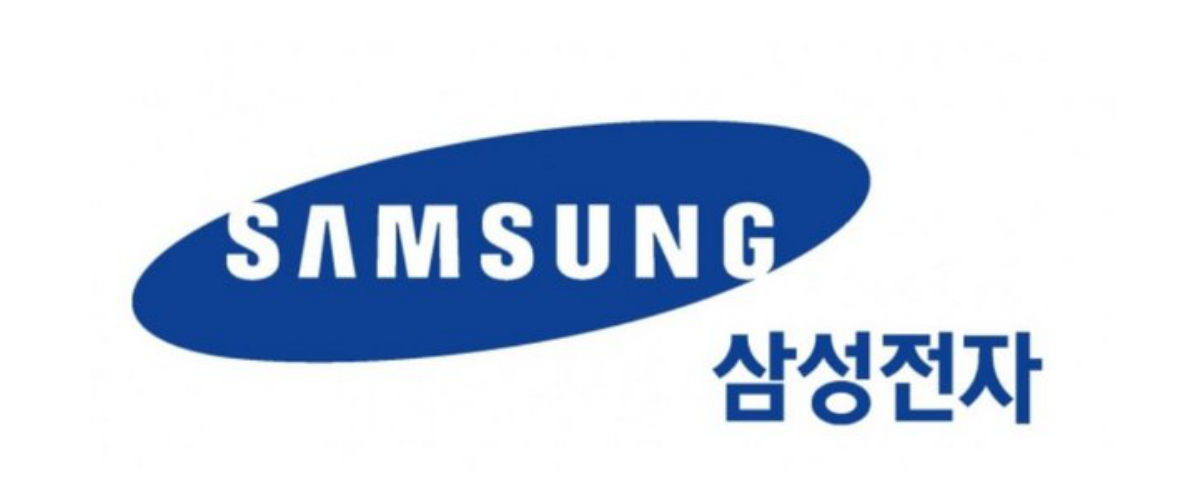

In [435]:
plt.figure(figsize=(15,8))
plt.imshow(image_data, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [436]:
from PIL import Image
import numpy as np

# 이미지 워드클라우드를 위한 전처리 함수
def preprocess_image_for_wordcloud(image):
    # image가 numpy 배열 형식이라면 PIL 이미지로 변환
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)
    
    # 이미지를 흑백으로 변환
    image = image.convert("L")  # 흑백 변환
    
    # 이진화 (픽셀 값이 128보다 작으면 0, 아니면 255로 변환)
    image = image.point(lambda x: 0 if x < 128 else 255, '1')

    # 이미지 크기 전환
    # image = image.resize((800, 800))
    
    # 결과 이미지 확인을 위한 출력 (선택적으로 사용)
    # image.show()  # 이 부분을 사용하여 전처리된 이미지를 시각적으로 확인할 수 있습니다.
    mask = np.array(image)
    return mask

# 전처리 함수 호출
Mask = preprocess_image_for_wordcloud(image_data)

# 전처리된 마스크 확인 (이미지로 출력하거나 마스크 배열을 확인)
print(Mask)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [437]:
wc = WordCloud(
    background_color = 'white',
    max_words=2000,
    mask=Mask,
    contour_width=3,
    contour_color="steelblue",
    font_path = 'NanumGothicEco.ttf'
)

text = re.sub(r'[^\w\s]', '', text) #특수문자등을 제거


text = text.split(' ')
print(text)
bucket = ''
for word in text :
    if not word in x_words:
        bucket += ' '
        bucket += word
        
wc.generate(bucket)

word_list = list(wc.words_.keys())
word_list[0:10]

['', '삼성전자', '삼성전자', '주가', '삼성', '라이온즈', '삼성', '서비스센터', '삼성카드', '전자담배', '전자레인지', '전자소송', '전자피아노', '전자공시시스템', '주식', '주식시세', '주식사는법', '주식분석', '국내주식', '기술보증기금', '기술', '배우기', '기술', '기술사', '기술인협회', '반도체', '전망', '반도체', '반도체', '관련주', '반도체', '회사', '반도체학과', '스마트폰', '스마트폰이란', '스마트폰기기변경', '스마트폰내시경', '싼스마트폰', '갤럭시', 's24', '갤럭시', 's24', '울트라', '갤럭시', 's25', '갤럭시', 'z플립6', '갤럭시워치', 'oled', 'tv', 'oled', '모니터', 'oled', 'OLED65A3SNA', 'OLED77C4FNA', '디스플레이', '뜻', '디스플레이', '확장', '디스플레이', '디스플레인', '디스플레이', '해상도', '혁신도시', '맛집', '혁신', 'cgv', '혁신개념', '혁신도시', '혁신', 'ai', 'ai', '그림', 'ai', '관련주', 'ai', '인공지능', 'ai', '뜻', '메모리카드', '메모리폼', '메모리폼', '베개', '메모리폼', '매트리스', '메모리', '5g', 'lte', '변경', '5g', '요금제', '5g', '속도', '5g', 'lte', '5g', '이이경', '이익', '이익순', '이익준', '이익잉여금', '차세대', '나라장터', '차세대', '차세대주유소', '차세대', '뜻', '차세대발사체', '글로벌', '나이프', '글로벌텍스프리', '글로벌', '글로벌사이버대학교', '글로벌세아', '시장바구니', '캐리어', '시장', '광장시장', '망원시장', '벼룩시장', '투자자산운용사', '투자', '투잡', '투잡커넥트', '한국투자증권', '배당금', '높은', '주식', '배당주', '배당', 'etf', '배당금'

['ai', '5g', '경쟁력', '반도체', '갤럭시', '디스플레이', 'oled', '뜻', '메모리폼', '차세대']

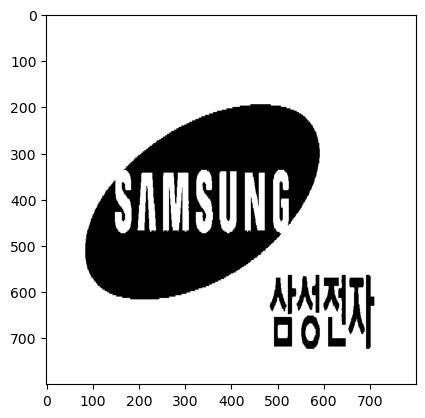

In [438]:
plt.imshow(mask, cmap='gray')
# 이미지 확인용 코드

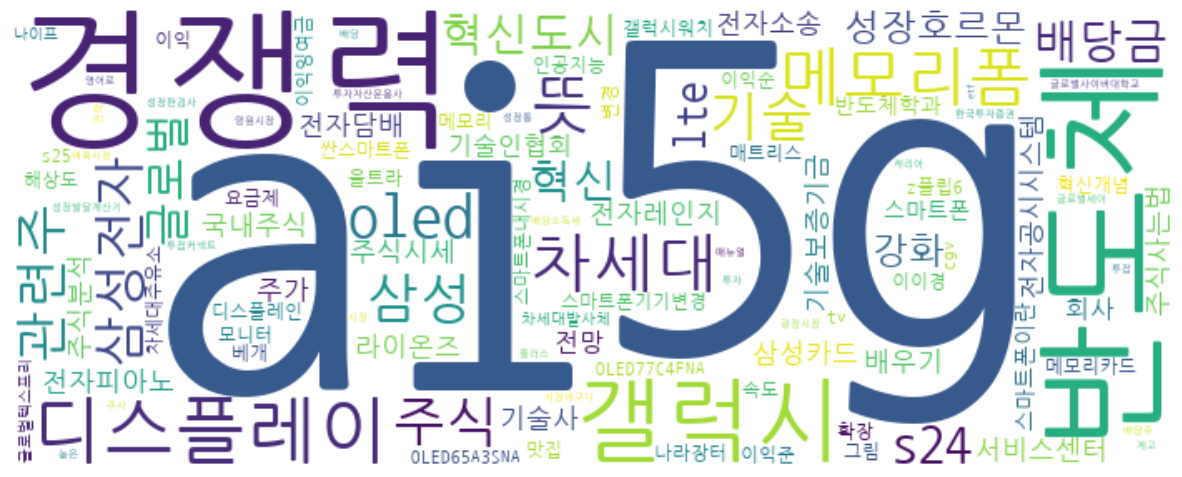

In [439]:
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [441]:
# import streamlit as st

# st.image(showman)
# st.text("안녕하세요. 나의 첫번째 streamlit app 입니다.")
# st.button("what")